<a href="https://colab.research.google.com/github/mohdishaqedunet-cmyk/TASK-9/blob/main/TASK_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/creditcard.csv")

# Check fraud vs non-fraud counts
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True))

Class
0.0    27725
1.0       93
Name: count, dtype: int64
Class
0.0    0.996657
1.0    0.003343
Name: proportion, dtype: float64


In [4]:
# Target variable
y = df['Class']

# Drop target and non-useful identifier columns
X = df.drop(columns=['Class', 'Time'])

In [6]:
from sklearn.model_selection import train_test_split

# Drop rows where y is NaN, and apply the same index to X
not_nan_indices = y.dropna().index
X = X.loc[not_nan_indices]
y = y.loc[not_nan_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [7]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [9]:
from sklearn.metrics import classification_report

# Logistic Regression evaluation
log_preds = log_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, log_preds))

# Random Forest evaluation
rf_preds = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, rf_preds))


Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5545
         1.0       0.18      0.84      0.30        19

    accuracy                           0.99      5564
   macro avg       0.59      0.91      0.65      5564
weighted avg       1.00      0.99      0.99      5564

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5545
         1.0       0.94      0.79      0.86        19

    accuracy                           1.00      5564
   macro avg       0.97      0.89      0.93      5564
weighted avg       1.00      1.00      1.00      5564



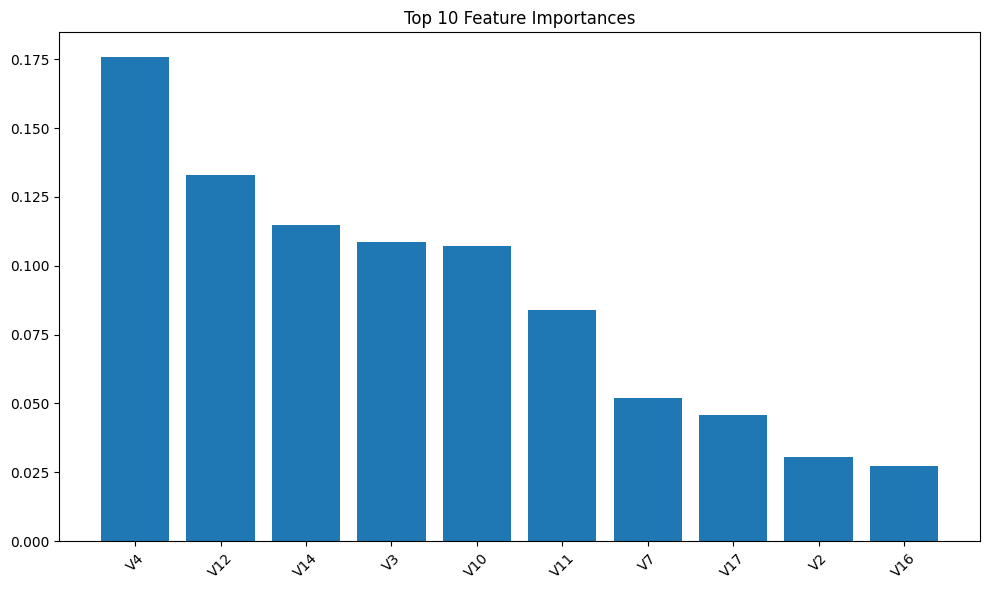

In [10]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), feature_names[indices][:10], rotation=45)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


In [11]:
import joblib

joblib.dump(rf_model, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']